<a href="https://colab.research.google.com/github/GhaziBenHenia/Principal_Component_Analysis_and_Support_Vector_Machines/blob/main/PCA_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis and Support Vector Machines**


# 1) Introduction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/dataflower

/content/drive/MyDrive/dataflower


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataflower/flowerTrain_data.csv')

In [ ]:
dataset.head()

,4.7,3.2,1.3,0.2,interior
0,4.6,3.1,1.5,0.2,interior
1,5.0,3.6,1.4,0.2,interior
2,5.4,3.9,1.7,0.4,interior
3,4.6,3.4,1.4,0.3,interior
4,5.0,3.4,1.5,0.2,interior


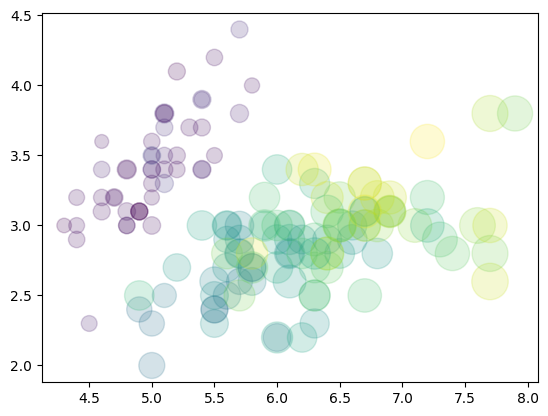

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/dataflower/flowerTrain_data.csv',
                      names=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
X = dataset.iloc[:,0:4]
plt.scatter(dataset.iloc[:,0],dataset.iloc[:,1],alpha = 0.2,
            s = 100 * dataset.iloc[:,2],c = 100 * dataset.iloc[:,3])

 # 2) Principal Component Analysis

In [ ]:
# 2.1 mean of all measures
mean_X = np.mean(X)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
mean_X

sepal length    5.840278
sepal width     3.050000
petal length    3.754861
petal width     1.195139
dtype: float64

In [ ]:
# 2.2 Shifting X by this mean
X_shift = X - mean_X

In [ ]:
# 2.3 Covariance matrix
cov_matrix = np.cov(X_shift)

In [ ]:
# 2.4 Singular Value Decomposition to extract eigenvalues and normalized eigenvectors
eig_val_U, eig_vect_U = np.linalg.eig(cov_matrix)

In [ ]:
# 2.5 largest eigenvalues and their corresponding eigenvectors
p = 2

# eigenvalues and eigenvectors sorted in descending order
sorted_indices = np.argsort(eig_val_U)[::-1]
eig_val_U_sorted = eig_val_U[sorted_indices]
eig_vect_U_sorted = eig_vect_U[:, sorted_indices]

# Reduced U to the corresponding p eigenvectors
eig_val_U_reduced = eig_val_U_sorted[:p]
eig_vect_U_reduced = eig_vect_U_sorted[:, :p]

In [ ]:
S = np.dot(eig_vect_U_reduced.T, X_shift)

# 2.1 Practicing PCA on two examples

In [ ]:
def PCA_func(X, reducedDim):
    # mean of all measures
    mean_X = np.mean(X, axis=0)
    # Shifting X by this mean
    X_shift = X - mean_X
    # covariance matrix
    cov_matrix = np.cov(X_shift, rowvar=False)
    # Singular Value Decomposition to extract eigenvalues and normalized eigenvectors
    eig_val_U, eig_vect_U = np.linalg.eigh(cov_matrix)

    # eigenvalues and eigenvectors sorted in descending order
    sorted_indices = np.argsort(eig_val_U)[::-1]
    eig_val_U_sorted = eig_val_U[sorted_indices]
    eig_vect_U_sorted = eig_vect_U[:, sorted_indices]

    # Reduced U to the corresponding p eigenvectors
    # eig_val_U_reduced = eig_val_U_sorted[:reducedDim]
    eig_vect_U_reduced = eig_vect_U_sorted[:, :reducedDim]

    S = np.dot(X_shift, eig_vect_U_reduced)

    return S

In [ ]:
# Calling the PCA Function
x1 = np.array([[1, 5, 3, 3], [4, 4, 3, 5]])
x2 = np.array([[1.268, 4.732, 3.5, 2.5], [3, 5, 3.134, 4.866]])
reducedDim = 2
print('Example 1 :\n',PCA_func(x1, reducedDim))
print('Example 2 :\n',PCA_func(x2, reducedDim))

Example 1 :
 [[-1.87082869e+00  1.11022302e-16]
 [ 1.87082869e+00 -1.11022302e-16]]
Example 2 :
 [[-1.48353969e+00 -7.34402892e-17]
 [ 1.48353969e+00 -3.70648921e-16]]


# 2.2 Applying PCA to the flower dataset

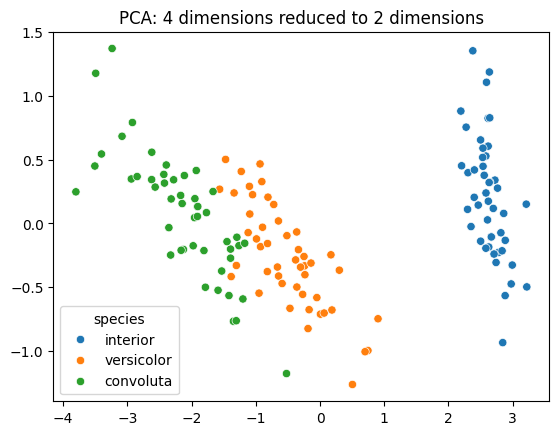

In [ ]:
reducedDim = 2
S = PCA_func(X, reducedDim)
sb.scatterplot(x=S[:, 0], y=S[:, 1], hue=dataset['species'])
plt.title(f'PCA: {X.shape[1]} dimensions reduced to {reducedDim} dimensions')
plt.show()

# 3 Support Vector Machine

In [ ]:
#Initializing a Support Vector Machine (SVM) classifier object
svm = SVC(kernel ='linear', C=1E10)

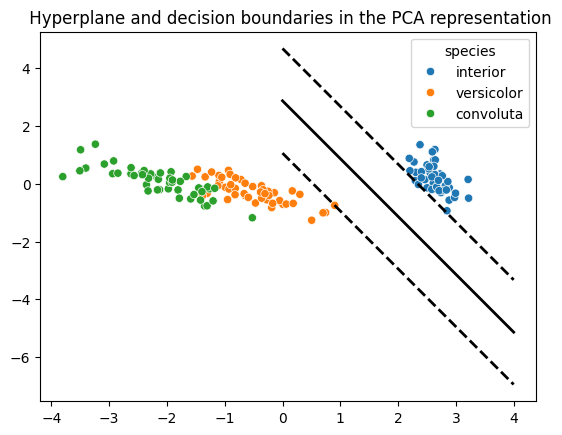

In [ ]:
#Assigning the target feature
Target = dataset['species']

# PCA_Function to reduce the data to 2 dimensions
X_pca = PCA_func(X, reducedDim=2)

df0 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df1 = pd.DataFrame(Target)
df2 = pd.concat([df0, df1], axis = 1)


label=np.where(Target == 'interior',1,0)
# Training an SVM on the PCA-transformed data
svm.fit(df0, label)
w = svm.coef_[0]
a=-w[0]/w[1]
x=np.linspace(0,4,3)
y = a*x - (svm.intercept_[0]/w[1])
b = svm.support_vectors_[0]
y_down = a*x + (b[1] - a*b[0])
b = svm.support_vectors_[-1]
y_up = a * x + (b[1] - a*b[0])


plt.plot(x,y,linewidth = 2, color='black')
plt.plot(x,y_down,linewidth = 2, color='black', linestyle= '--')
plt.plot(x,y_up,linewidth = 2, color='black', linestyle='--')



# Plotting the data points
plt.title(' Hyperplane and decision boundaries in the PCA representation')
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dataset['species'])
plt.show()


# 4) Classifying new samples

In [ ]:
New_sample = np.array([[5.1, 3.5, 1.4, 0.2], [7.0, 3.2, 4.7, 1.4], [6.4, 3.2, 4.5, 1.5],
                        [6.3, 3.3, 6.0, 2.5], [5.8, 2.7, 5.1, 1.9], [4.9, 3.0, 1.4, 0.2]])
# Calling the PCA Function
reducedDim = 2
New_sample_pca = PCA_func(New_sample, reducedDim)
New_sample_df = pd.DataFrame(New_sample_pca, columns=['PC1', 'PC2'])
predictions = svm.predict(New_sample_df)

In [ ]:
predictions #1 means interior flower, 0 means not interior flower

array([1, 0, 0, 0, 0, 1])

Testing with classic SVM model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_data = dataset.drop('species', axis=1)
y_data = dataset['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=5)

model = SVC(kernel ='linear', C=1E10)

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [ ]:
# Features for new samples
new_samples = np.array([[5.1, 3.5, 1.4, 0.2], [7.0, 3.2, 4.7, 1.4], [6.4, 3.2, 4.5, 1.5],
                        [6.3, 3.3, 6.0, 2.5], [5.8, 2.7, 5.1, 1.9], [4.9, 3.0, 1.4, 0.2]])

# Feature names
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Create a DataFrame with feature names
new_samples_df = pd.DataFrame(new_samples, columns=feature_names)

print("New Samples DataFrame:")
print(new_samples_df)


New Samples DataFrame:
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           7.0          3.2           4.7          1.4
2           6.4          3.2           4.5          1.5
3           6.3          3.3           6.0          2.5
4           5.8          2.7           5.1          1.9
5           4.9          3.0           1.4          0.2


In [ ]:
predictions = model.predict(new_samples_df)

In [ ]:
predictions

array(['interior', 'versicolor', 'versicolor', 'convoluta', 'convoluta',
       'interior'], dtype=object)

====> Both models gave the same results